In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree
import seaborn as sns
from sklearn.datasets import make_blobs, make_classification
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import sklearn.tree as tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
NBA = pd.read_csv("hf://datasets/suzyanil/nba-data/nba_games_stats.csv")
NBA.to_csv("NBA_dataset.csv", index=False)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [4]:
NBA['WINorLOSS'] = LabelEncoder().fit_transform(NBA['WINorLOSS'])

In [5]:
X = NBA.drop(columns=['WINorLOSS', 'Date', 'Team', 'Opponent', 'Game', 'Unnamed: 0', 'Home','TeamPoints','OpponentPoints'])
y = NBA['WINorLOSS']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Model Accuracy: {accuracy:.2f}")

Decision Tree Model Accuracy: 0.82


In [7]:
confusion_matrix(y_test,y_pred)

array([[822, 187],
       [171, 788]])

RANDOM FOREST

In [8]:
NBA_RF = RandomForestClassifier(random_state=42, n_estimators=100)
NBA_RF.fit(X_train, y_train)

rf_y_pred = NBA_RF.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f"Random Forest Model Accuracy: {rf_accuracy:.2f}")

rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)
print(f"Confusion Matrix:\n{rf_conf_matrix}")

Random Forest Model Accuracy: 0.91
Confusion Matrix:
[[924  85]
 [ 87 872]]


KNN MODEL

In [9]:
NBA_KNN = KNeighborsClassifier(n_neighbors=5)
NBA_KNN.fit(X_train, y_train)

knn_y_pred = NBA_KNN.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_y_pred)
print(f"KNN Model Accuracy: {knn_accuracy:.2f}")

knn_conf_matrix = confusion_matrix(y_test, knn_y_pred)
print(f"Confusion Matrix:\n{knn_conf_matrix}")

KNN Model Accuracy: 0.84
Confusion Matrix:
[[833 176]
 [134 825]]


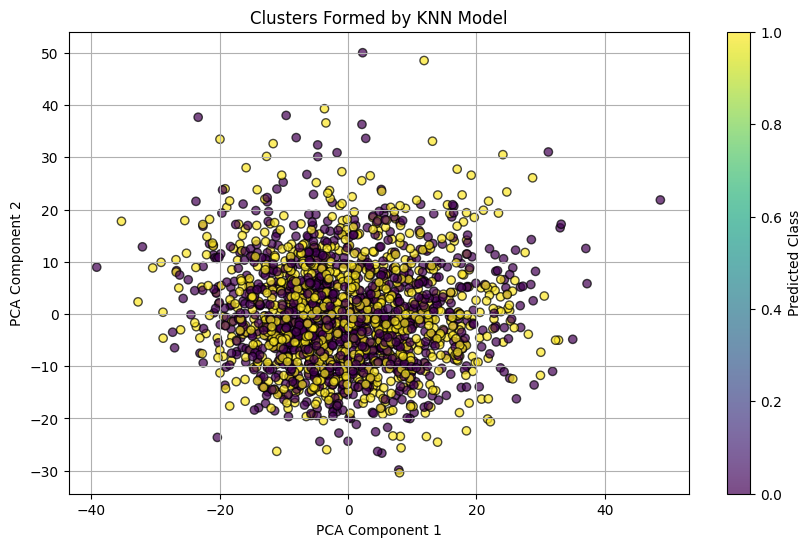

In [10]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Fit the KNN model again (if necessary)
NBA_KNN = KNeighborsClassifier(n_neighbors=500)
NBA_KNN.fit(X_train, y_train)

# Predict labels for the test set
knn_y_pred = NBA_KNN.predict(X_test)

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=knn_y_pred, cmap='viridis', alpha=0.7, edgecolor='k')
plt.title("Clusters Formed by KNN Model")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Predicted Class")
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


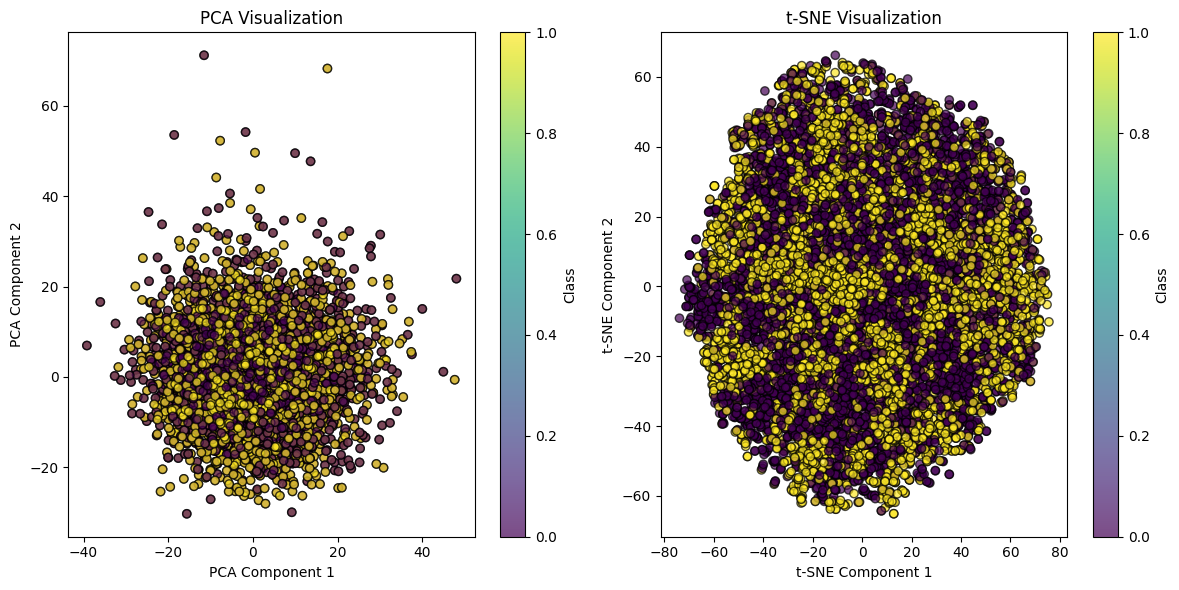

In [13]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Apply PCA to reduce data to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Apply t-SNE to reduce data to 2 dimensions
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X)

# Plot PCA results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7, edgecolor='k')
plt.title("PCA Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Class")

# Plot t-SNE results
plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', alpha=0.7, edgecolor='k')
plt.title("t-SNE Visualization")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.colorbar(label="Class")

plt.tight_layout()
plt.show()

SVC MODEL

In [23]:
svm_model = SVC(gamma='auto')
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
print(f'Support Vector Classifier Test Accuracy: {test_accuracy:.4f}')

Support Vector Classifier Test Accuracy: 0.5467


ADA BOOST

In [15]:
ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)
ada_accuracy = accuracy_score(y_test, y_pred_ada)

print(f'AdaBoost - Test Accuracy: {ada_accuracy:.4f}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost - Test Accuracy: 0.9411


GRADIENT BOOST

In [16]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, y_pred_gb)

print(f'Gradient Boosting - Test Accuracy: {gb_accuracy:.4f}')

Gradient Boosting - Test Accuracy: 0.9395


EXTREMELY RANDOMIZED TREES

In [17]:
et_model = ExtraTreesClassifier()
et_model.fit(X_train, y_train)
y_pred_et = et_model.predict(X_test)
et_accuracy = accuracy_score(y_test, y_pred_et)

print(f'Extremely Randomized Trees - Test Accuracy: {et_accuracy:.4f}')

Extremely Randomized Trees - Test Accuracy: 0.9162


HISTOGRAM GRADIENT BOOST

In [18]:
hgb_model = HistGradientBoostingClassifier()
hgb_model.fit(X_train, y_train)
y_pred_hgb = hgb_model.predict(X_test)
hgb_accuracy = accuracy_score(y_test, y_pred_hgb)

print(f'Histogram Gradient Boosting - Test Accuracy: {hgb_accuracy:.4f}')

Histogram Gradient Boosting - Test Accuracy: 0.9533


Logistic Regression

In [21]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification)

Accuracy: 1.00
Confusion Matrix:
[[1009    0]
 [   0  959]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1009
           1       1.00      1.00      1.00       959

    accuracy                           1.00      1968
   macro avg       1.00      1.00      1.00      1968
weighted avg       1.00      1.00      1.00      1968

